In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [8]:
uber_data_apr14 = pd.read_csv('Uber-dataset/uber-raw-data-apr14.csv/uber-raw-data-apr14.csv')
uber_data_may14 = pd.read_csv('Uber-dataset/uber-raw-data-may14.csv/uber-raw-data-may14.csv')
uber_data_jun14 = pd.read_csv('Uber-dataset/uber-raw-data-jun14.csv/uber-raw-data-jun14.csv')
uber_data_jul14 = pd.read_csv('Uber-dataset/uber-raw-data-jul14.csv/uber-raw-data-jul14.csv')
uber_data_aug14 = pd.read_csv('Uber-dataset/uber-raw-data-aug14.csv/uber-raw-data-aug14.csv')
uber_data_sep14 = pd.read_csv('Uber-dataset/uber-raw-data-sep14.csv/uber-raw-data-sep14.csv')

### Check column legnth of the datasets

In [9]:
print("Length of the april 2014 dataset(row/column): " + str(len(uber_data_apr14)) +"/"+str(len(uber_data_apr14.columns)))
print("Length of the may 2014 dataset(row/column): " + str(len(uber_data_may14)) +"/" + str(len(uber_data_may14.columns)))
print("Length of the jun 2014 dataset(row/column): " + str(len(uber_data_jun14)) +"/" +str(len(uber_data_jun14.columns)))
print("Length of the july 2014 dataset(row/column): " + str(len(uber_data_jul14)) +"/"+ str(len(uber_data_jul14.columns)))
print("Length of the august 2014 dataset(row/column): " + str(len(uber_data_aug14)) +"/"+ str(len(uber_data_aug14.columns)))
print("Length of the september 2014 dataset(row/column): " + str(len(uber_data_sep14)) +"/"+ str(len(uber_data_sep14.columns)))

Length of the april 2014 dataset(row/column): 564516/4
Length of the may 2014 dataset(row/column): 652435/4
Length of the jun 2014 dataset(row/column): 663844/4
Length of the july 2014 dataset(row/column): 796121/4
Length of the august 2014 dataset(row/column): 829275/4
Length of the september 2014 dataset(row/column): 1028136/4


### Check Null data in dataset

In [10]:
print("Uber dataset april 2014: " + str(uber_data_apr14.isnull().sum()))
print("Uber dataset may 2014: " + str(uber_data_may14.isnull().sum()))
print("Uber dataset jun 2014: " + str(uber_data_jun14.isnull().sum()))
print("Uber dataset july 2014: " + str(uber_data_jul14.isnull().sum()))
print("Uber dataset august 2014: " + str(uber_data_aug14.isnull().sum()))
print("Uber dataset september 2014: " + str(uber_data_sep14.isnull().sum()))

Uber dataset april 2014: Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64
Uber dataset may 2014: Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64
Uber dataset jun 2014: Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64
Uber dataset july 2014: Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64
Uber dataset august 2014: Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64
Uber dataset september 2014: Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64


### Combine all the data (April to September 2014)

In [11]:
uber_data_apr_to_sep_14 = pd.concat([uber_data_apr14, uber_data_may14, uber_data_jun14, uber_data_jul14, uber_data_aug14, uber_data_sep14])

In [12]:
uber_data_apr_to_sep_14

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512
...,...,...,...,...
1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764
1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764


### Make new columns (year, month, dayofweek, dayofweekname, day, hour) based on the Date/Time

In [13]:
uber_data_apr_to_sep_14['Date/Time'] = pd.to_datetime(uber_data_apr_to_sep_14['Date/Time'], format="%m/%d/%Y %H:%M:%S")
uber_data_apr_to_sep_14['year'] = uber_data_apr_to_sep_14['Date/Time'].dt.year
uber_data_apr_to_sep_14['month'] = uber_data_apr_to_sep_14['Date/Time'].dt.month
uber_data_apr_to_sep_14['dayofweek'] = uber_data_apr_to_sep_14['Date/Time'].dt.dayofweek
uber_data_apr_to_sep_14['dayofweekname'] = uber_data_apr_to_sep_14['Date/Time'].dt.day_name()
uber_data_apr_to_sep_14['day'] = uber_data_apr_to_sep_14['Date/Time'].dt.day
uber_data_apr_to_sep_14['hour'] = uber_data_apr_to_sep_14['Date/Time'].dt.hour

In [14]:
uber_data_apr_to_sep_14

,Date/Time,Lat,Lon,Base,year,month,dayofweek,dayofweekname,day,hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,2014,4,1,Tuesday,1,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,2014,4,1,Tuesday,1,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,2014,4,1,Tuesday,1,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,2014,4,1,Tuesday,1,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,2014,4,1,Tuesday,1,0
...,...,...,...,...,...,...,...,...,...,...
1028131,2014-09-30 22:57:00,40.7668,-73.9845,B02764,2014,9,1,Tuesday,30,22
1028132,2014-09-30 22:57:00,40.6911,-74.1773,B02764,2014,9,1,Tuesday,30,22
1028133,2014-09-30 22:58:00,40.8519,-73.9319,B02764,2014,9,1,Tuesday,30,22
1028134,2014-09-30 22:58:00,40.7081,-74.0066,B02764,2014,9,1,Tuesday,30,22


### Check when passengers use Uber the most during the day/week/month.

In [15]:
uber_data_apr_to_sep_14['hour'].value_counts()

17    336190
18    324679
16    313400
19    294513
20    284604
21    281460
15    275466
22    241858
14    230625
13    195877
7     193094
8     190504
12    170452
23    169190
11    165703
9     159967
10    159148
6     143213
0     103836
5      83939
1      67227
4      55230
3      48287
2      45865
Name: hour, dtype: int64

In [16]:
uber_data_apr_to_sep_14['dayofweekname'].value_counts()

Thursday     755145
Friday       741139
Wednesday    696488
Tuesday      663789
Saturday     646114
Monday       541472
Sunday       490180
Name: dayofweekname, dtype: int64

In [17]:
uber_data_apr_to_sep_14['month'].value_counts()

9    1028136
8     829275
7     796121
6     663844
5     652435
4     564516
Name: month, dtype: int64

### Uber Trip by Hour and Month

Text(0.5, 1.0, 'Uber Trip by Hour and Month')

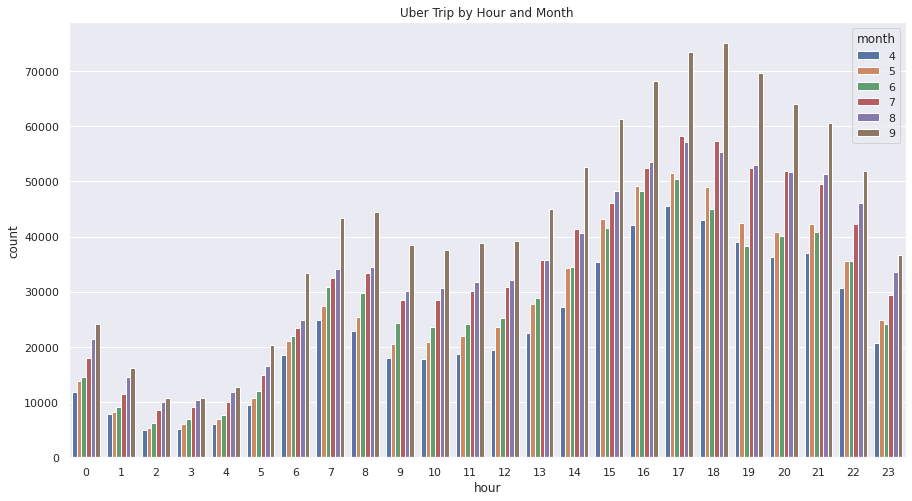

In [22]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(x="hour",hue="month", data=uber_data_apr_to_sep_14).set_title('Uber Trip by Hour and Month')

### Uber Trip by Day and Month

Text(0.5, 1.0, 'Uber Trip by Day and Month')

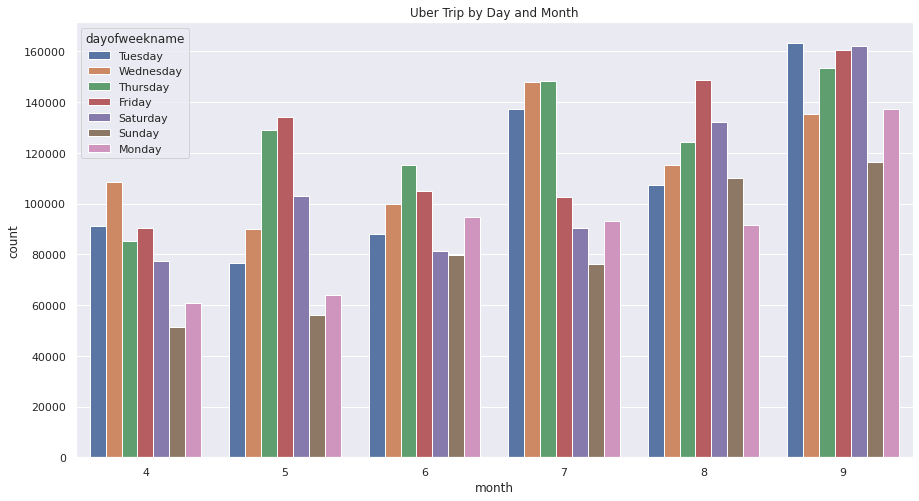

In [32]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(x="month",hue="dayofweekname", data=uber_data_apr_to_sep_14).set_title('Uber Trip by Day and Month')

### Uber Trip by Base

Text(0.5, 1.0, 'Uber Trip by Base')

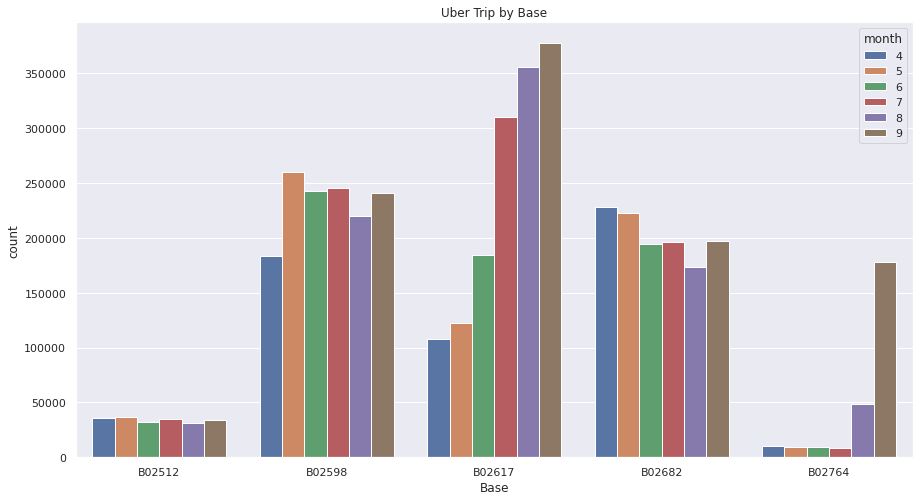

In [34]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(x="Base",hue="month", data=uber_data_apr_to_sep_14).set_title('Uber Trip by Base')

## Conclusion
- Passenger uses the Uber most at 5 p.m.
- Passengers usually use Uber most on Thursdays and Fridays.
- From April to September, the number of passengers using Uber increased.
- Most Passenger uses the Uber at Base B02617.